<a href="https://colab.research.google.com/github/budennovsk/Pandas/blob/master/ols_sku_v5_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:

import pandas as pd
df_org = pd.read_excel('/content/mat_y_40_sku.xlsx')

In [42]:
# df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(Day=1)).dt.to_period('M')
df_org

,Month,Year,Sku_name,Analytic1,Articul8,Brand,PRICE_PER_UNIT,SALES_VOL,SHARE_VOL_PROMO,SHARE_VOL
0,1,2022,"Сыр полутвёрдый BELFOR Флоу-пак 240 г 45,0%",240 г,Другой3,BELFOR,757.015534,68.88,0.971298,1.489290e-04
1,2,2022,"Сыр полутвёрдый BELFOR Флоу-пак 240 г 45,0%",240 г,Другой3,BELFOR,767.246528,2.88,0.491319,6.289358e-06
2,3,2022,"Сыр полутвёрдый BELFOR Флоу-пак 240 г 45,0%",240 г,Другой3,BELFOR,999.458333,0.24,0.000000,6.017645e-07
3,1,2024,Сыр полутвёрдый Casa Margot Эмменталер Флоу-па...,150 г,Эмменталер,Casa Margot,3024.421769,14.70,0.777143,2.575605e-05
4,2,2024,Сыр полутвёрдый Casa Margot Эмменталер Флоу-па...,150 г,Эмменталер,Casa Margot,3118.870635,12.60,0.726190,2.190801e-05
...,...,...,...,...,...,...,...,...,...,...
2030,10,2023,Сыр полутвёрдый Эконива Щучанский Флоу-пак 200...,200 г,Классический,Эконива,685.842388,14049.80,0.712729,2.220259e-02
2031,11,2022,Сыр полутвёрдый Эконива Щучанский Флоу-пак 200...,200 г,Классический,Эконива,851.198597,3244.00,0.410310,5.385691e-03
2032,11,2023,Сыр полутвёрдый Эконива Щучанский Флоу-пак 200...,200 г,Классический,Эконива,702.743684,12592.60,0.418561,2.123730e-02
2033,12,2022,Сыр полутвёрдый Эконива Щучанский Флоу-пак 200...,200 г,Классический,Эконива,800.631289,8167.40,0.680883,1.545795e-02


In [43]:
def get_boost_feature(X,y):
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.metrics import mean_squared_error
    from sklearn.ensemble import GradientBoostingRegressor

    # Настроим и обучим модель Gradient Boosting Regressor
    gbr_model = GradientBoostingRegressor(n_estimators=500, max_depth=6, learning_rate=0.1, random_state=42)
    # Настроим и обучим модель Gradient Boosting Regressor
    # print(X)
    # print(y)
    # Обучение модели
    gbr_model.fit(X.to_frame(), y.to_frame())


    # Для отслеживания ошибки на каждой итерации
    train_errors = []

    # Используем staged_predict для получения предсказаний на каждой итерации
    for stage in gbr_model.staged_predict(X.to_frame()):
        # Расчет RMSE
        rmse = np.sqrt(mean_squared_error(y, stage))
        train_errors.append(rmse)

    # Построение графика RMSE по итерациям
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(train_errors) + 1), train_errors, marker='o', color='blue', linestyle='-')
    plt.title('График обучения: RMSE по итерациям')
    plt.xlabel('Итерация')
    plt.ylabel('RMSE')
    plt.grid(True)
    plt.xticks(np.arange(1, len(train_errors) + 1, step=5), rotation=90)  # Настройка меток по оси X
    plt.show()

    # Предсказания для модели Gradient Boosting
    y_pred_gbr = gbr_model.predict(X.to_frame())

    # mean_market_shares
    # mean_org

    # market_share_before,new_df
    from sklearn.metrics import mean_absolute_error, r2_score
    # Расчет MAE

    mae = mean_absolute_error(y.values,y_pred_gbr)
    print(f'MAE: {mae:.2f}')

    # Расчет R²
    r2 = r2_score(y.values,y_pred_gbr)
    # print(f'R²: {r2:.2f}')

    # Расчет WAPE
    wape = sum(abs((y.values - y_pred_gbr)) / sum((y.values)))
    print(f'WAPE: {wape:.2f}')

    # Количество наблюдений и количество предикторов
    n = len(X)  # количество наблюдений
    p = 1  # количество предикторов (в данном случае это предсказанная доля рынка)

    # Вычисление скорректированного R²
    r2_adj = 1 - (1 - r2) * (n - 1) / (n - p - 1)

    # Вывод значений R² и R²_adj
    print(f'R²: {r2:.2f}')
    print(f'R² Adjusted: {r2_adj:.2f}')
    return y_pred_gbr


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


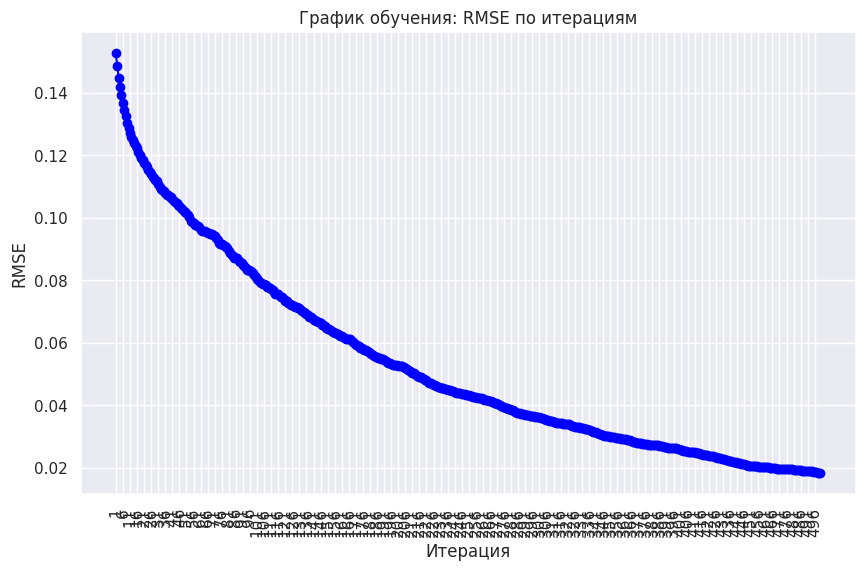

MAE: 0.01
WAPE: 0.01
R²: 0.99
R² Adjusted: 0.99
Базовая ску  Сыр полутвёрдый Брест Литовск Монастырский Флоу-пак 200 г 45,0%
Итерация 1: удаляем 'delta_Brand_Белебеевский' с p-значением 0.9187
Итерация 2: удаляем 'delta_Cheese_Type_Гауда' с p-значением 0.7116
Итерация 3: удаляем 'delta_Brand_Радость вкуса' с p-значением 0.8600
Итерация 4: удаляем 'delta_Cheese_Type_Маасдам' с p-значением 0.5849
Итерация 5: удаляем 'delta_Cheese_Type_Топленое молоко' с p-значением 0.4285
Итерация 6: удаляем 'delta_Brand_LAPLANDIA' с p-значением 0.3982
Итерация 7: удаляем 'delta_Cheese_Type_Колыбельский' с p-значением 0.2498
Итерация 8: удаляем 'delta_Cheese_Type_Российский' с p-значением 0.2700
Итерация 9: удаляем 'delta_Cheese_Type_Монастырский' с p-значением 0.2060
Итерация 10: удаляем 'delta_Cheese_Type_Сливочный' с p-значением 0.3159
Итерация 11: удаляем 'delta_Cheese_Type_Тильзитер' с p-значением 0.1807
Итерация 12: удаляем 'delta_Package_Weight' с p-значением 0.0596
Все оставшиеся признаки значимы

<ipython-input-44-186434f86656>:206: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  prediction_data = prediction_data.groupby('period').apply(lambda x: x.assign(pred_market_share=x['exp_V'] / x['exp_V'].sum())).reset_index(drop=True)
<ipython-input-44-186434f86656>:213: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  prediction_data_after = prediction_data_after.groupby('period').apply(lambda x: x.assign(pred_

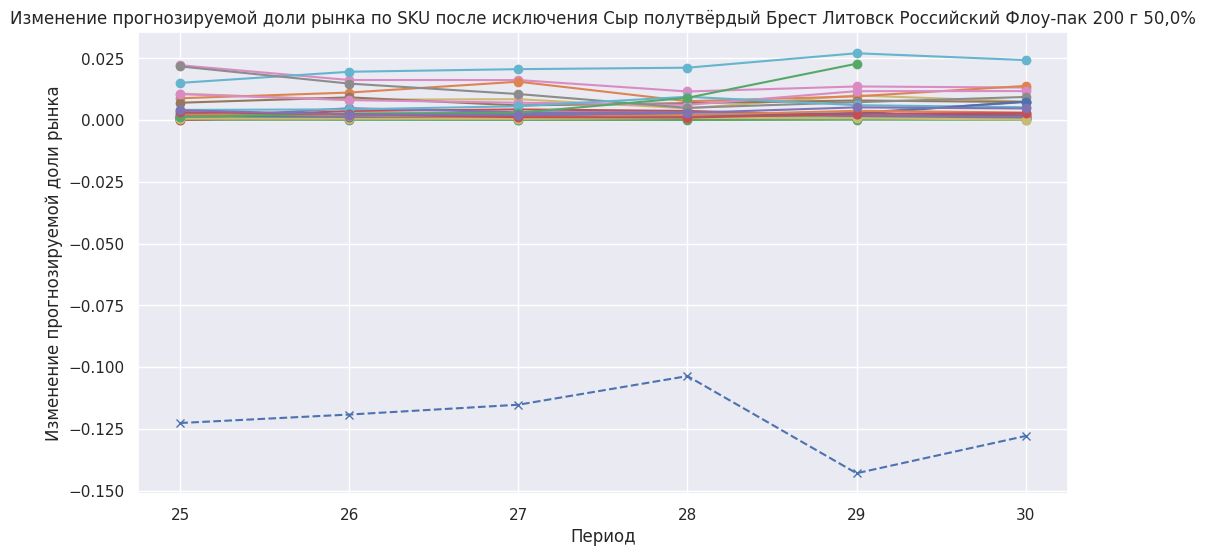

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

if 'data' in locals():
    del data
df_org_top_25 = df_org.groupby(['Sku_name'])['SALES_VOL'].sum()
sku_top_25=df_org_top_25.sort_values(ascending=False).head(25)
df_r = df_org['Sku_name'].apply(lambda x: x in sku_top_25.index.values)
data = df_org[df_r].copy()
data
# del model_data
# del prediction_data

sns.set(style='darkgrid')

# Переименуем столбцы для удобства
data.rename(columns={
    'Month': 'month',
    'Year': 'year',
    'Sku_name': 'SKU',
    'Analytic1': 'Package_Info',
    'Articul8': 'Cheese_Type',
    'Brand': 'Brand',
    'PRICE_PER_UNIT': 'price_per_unit',
    'SALES_VOL': 'sales_volume',
    'SHARE_VOL_PROMO': 'promo_share',
    'SHARE_VOL': 'market_share_observed'
}, inplace=True)


# Создаем переменную 'period' на основе года и месяца
data['period'] = data['year'].astype(str) + '_' + data['month'].astype(str)
# Присваиваем уникальный номер каждому периоду
data['period'] = data['period'].astype('category').cat.codes + 1
# Функция для извлечения веса из строки
def extract_weight(package_info):
    import re
    match = re.search(r'(\d+)\s*г', package_info)
    if match:
        return int(match.group(1))
    else:
        return np.nan

# Применение функции к столбцу 'Package_Info'
data['Package_Weight'] = data['Package_Info'].apply(extract_weight)
# # Вычисляем среднюю цену по всем SKU
# mean_price = data['price_per_unit'].mean()
# # Вычисляем индекс цены относительно средней цены
# data['price_index'] = data['price_per_unit'] / mean_price

price_median = data['price_per_unit'].median()
data['price_index'] = data['price_per_unit'] / price_median

# Вычисляем квадрат индекса цены
# data['price_index_sq'] = data['price_index'] ** 2

data['price_index_sq']=get_boost_feature(data['sales_volume'],data['price_index'])

res_data = data.copy()
# Предполагая, что у вас есть DataFrame sku_df с колонкой 'Brand'

# Получаем список уникальных брендов
unique_brands = data['Brand'].unique()

# Автоматически присваиваем ASC значения каждому бренду
# Здесь мы используем функцию enumerate для присвоения уникального числа каждому бренду
asc_values = {brand: idx for idx, brand in enumerate(unique_brands)}

# Применяем присвоенные ASC к DataFrame
data['ASC'] = data['Brand'].map(asc_values)


# original_data = data.copy()

# data_test =data[data['year']>=2024].copy()
# data =data[data['year']<2024].copy()

# Заполняем пропущенные значения или удаляем строки с пропущенными значениями
data.dropna(inplace=True)

# Вычисляем общий объем продаж в каждом периоде
data['total_sales_volume'] = data.groupby('period')['sales_volume'].transform('sum')

# Вычисляем долю рынка для каждого SKU в каждом периоде
data['market_share'] = data['sales_volume'] / data['total_sales_volume']
base_sku = 'Сыр полутвёрдый Брест Литовск Монастырский Флоу-пак 200 г 45,0%'
print('Базовая ску  Сыр полутвёрдый Брест Литовск Монастырский Флоу-пак 200 г 45,0%')

if base_sku not in data['SKU'].unique():
    raise ValueError(f"Базовый SKU '{base_sku}' не найден в данных.")

# Данные базового SKU
base_data = data[data['SKU'] == base_sku][['period', 'market_share']].rename(columns={'market_share': 'base_market_share'})

# Объединяем с основной таблицей
data = pd.merge(data, base_data, on='period', how='left')

# Удаляем строки, где нет данных базового SKU
data.dropna(subset=['base_market_share'], inplace=True)
data['log_share_ratio'] = np.log(data['market_share'] / data['base_market_share'])
# Кодируем 'Cheese_Type' и 'Brand' с помощью One-Hot Encoding
data = pd.get_dummies(data, columns=['Cheese_Type', 'Brand'], drop_first=True)
characteristics = [
    'price_index', 'price_index_sq', 'promo_share', 'Package_Weight', 'ASC'
] + \
[data_col for data_col in data.columns if data_col.startswith('Cheese_Type_') or data_col.startswith('Brand_')]
# Кодируем категориальные переменные (Cheese_Type и Brand)
# df['Cheese_Type'] = df['Articul8']  # Используем 'Articul8' как тип сыра
# df = pd.get_dummies(df, columns=['Cheese_Type', 'Brand'], drop_first=True)
# # Преобразование bool переменных в int (0 или 1)
for col in data.columns:
    if data[col].dtype == bool:
        data[col] = data[col].astype(int)

# Данные характеристик базового SKU
base_characteristics = data[data['SKU'] == base_sku][['period'] + characteristics]
base_characteristics = base_characteristics.rename(columns=lambda x: 'base_' + x if x != 'period' else x)

# Объединяем базовые характеристики с основной таблицей
data = pd.merge(data, base_characteristics, on='period', how='left', suffixes=('', '_base'))

# Вычисляем разности характеристик
for char in characteristics:
    data['delta_' + char] = data[char] - data['base_' + char]

data_test =data[data['year']>=2024].copy()
data =data[data['year']<2024].copy()

model_data = data[data['SKU'] != base_sku].copy()
X_columns = ['delta_' + char for char in characteristics]
Y = model_data['log_share_ratio']
variables = X_columns.copy()
iteration = 1
while True:
    X = model_data[variables]
    # X = sm.add_constant(X)
    model = sm.OLS(Y, X).fit()
    # print(model.summary())
    # if [i for i in model.pvalues.index if i=='const']:
    # if model.pvalues.index[0]=='const':
      # print('fffff')
      # pvalues = model.pvalues.drop('const')
    # else:

    #   pvalues = model.pvalues
    pvalues = model.pvalues

    max_pvalue = pvalues.max()
    if max_pvalue > 0.05:
        variable_to_remove = pvalues.idxmax()
        print(f"Итерация {iteration}: удаляем '{variable_to_remove}' с p-значением {max_pvalue:.4f}")

        variables.remove(variable_to_remove)
        iteration += 1

    else:
        print("Все оставшиеся признаки значимы (p < 0.05).")
        break

# Выводим результаты финальной модели
print("\nРезультаты финальной модели:")
print(model.summary())



# 5: Прогнозирование долей рынка до исключения SKU_5

prediction_data = data_test.copy()

# prediction_data['market_share'] = prediction_data.groupby('period')['sales_volume'].transform(lambda x: x / x.sum())
# prediction_data = pd.get_dummies(prediction_data, columns=['Cheese_Type', 'Brand'], drop_first=True)

# # Объединяем базовые характеристики с данными
# base_characteristics = data_test[data_test['SKU'] == base_sku][['period'] + ['base_' + char for char in characteristics]]


# prediction_data = pd.merge(prediction_data, base_characteristics, on='period')


# # Убедимся, что все необходимые столбцы присутствуют
# all_columns = set(['delta_' + char for char in characteristics])
# missing_cols = all_columns - set(prediction_data.columns)
# for col in missing_cols:
#     prediction_data[col] = 0.0  # Используем тип float

# # Вычисляем разности характеристик
# for char in characteristics:
#     prediction_data[char] = prediction_data[char].astype(float)
#     prediction_data['base_' + char] = prediction_data['base_' + char].astype(float)
#     prediction_data['delta_' + char] = prediction_data[char] - prediction_data['base_' + char]

X_pred = prediction_data[variables]

# X_pred = sm.add_constant(X_pred, has_constant='add')

# Прогнозируем систематическую утилиту
prediction_data['V'] = model.predict(X_pred)


# Устанавливаем V = 0 для базовой SKU
prediction_data.loc[prediction_data['SKU'] == base_sku, 'V'] = 0
prediction_data['exp_V'] = np.exp(prediction_data['V'])
prediction_data = prediction_data.groupby('period').apply(lambda x: x.assign(pred_market_share=x['exp_V'] / x['exp_V'].sum())).reset_index(drop=True)
pred_market_share_before = prediction_data[['period', 'SKU', 'pred_market_share']]

# Шаг 6: Исключение SKU_5 и прогнозирование долей рынка после исключения

sku_to_exclude = 'Сыр полутвёрдый Брест Литовск Российский Флоу-пак 200 г 50,0%'  # Замените на фактическое название SKU, который хотите исключить
prediction_data_after = prediction_data[prediction_data['SKU'] != sku_to_exclude].copy()
prediction_data_after = prediction_data_after.groupby('period').apply(lambda x: x.assign(pred_market_share=x['exp_V'] / x['exp_V'].sum())).reset_index(drop=True)

# Шаг 7: Анализ результатов и визуализация

comparison = pd.merge(pred_market_share_before, prediction_data_after[['period', 'SKU', 'pred_market_share']], on=['period', 'SKU'], how='outer', suffixes=('_before', '_after'))
comparison['pred_market_share_after'] = comparison['pred_market_share_after'].fillna(0)
comparison['market_share_change'] = comparison['pred_market_share_after'] - comparison['pred_market_share_before']
mean_changes = comparison.groupby('SKU')['market_share_change'].mean().reset_index()
mean_changes = mean_changes.sort_values('market_share_change', ascending=False)
print("\nСреднее изменение прогнозируемых долей рынка после исключения SKU_5:")
print(mean_changes)

# Визуализация изменений долей рынка
plt.figure(figsize=(12, 6))
for sku in data['SKU'].unique():
    sku_data = comparison[comparison['SKU'] == sku]
    if sku != sku_to_exclude:
        plt.plot(sku_data['period'], sku_data['market_share_change'], marker='o', label=sku)
    else:
        plt.plot(sku_data['period'], -sku_data['pred_market_share_before'], marker='x', linestyle='--', label=sku)
plt.xlabel('Период')
plt.ylabel('Изменение прогнозируемой доли рынка')
plt.title(f'Изменение прогнозируемой доли рынка по SKU после исключения {sku_to_exclude}')
# plt.legend()
plt.show()



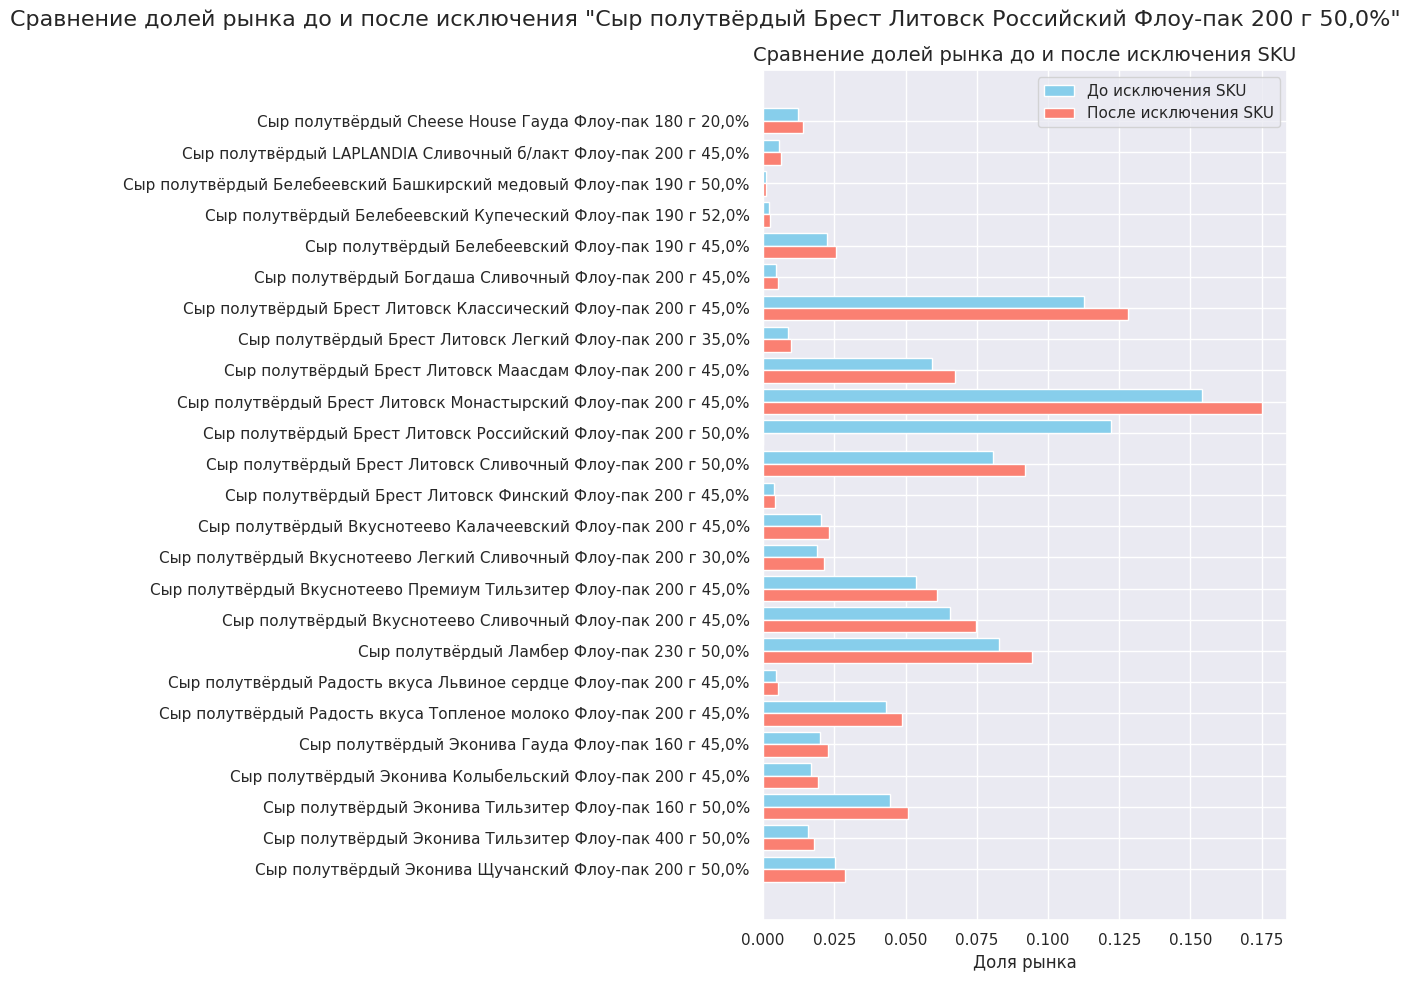


Доля рынка 'Сыр полутвёрдый Брест Литовск Российский Флоу-пак 200 г 50,0%' до исключения: 0.1219
Доля рынка 'Сыр полутвёрдый Брест Литовск Российский Флоу-пак 200 г 50,0%' после исключения: 0.0000


In [45]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Функция для построения горизонтальной диаграммы с фильтрацией меток по доле рынка
def plot_horizontal_bar_chart_with_filtered_labels(ax, sizes_before, sizes_after, labels, title, min_share=0.10):
    # Фильтрация меток, отображаем только те, у которых доля >= min_share в любом из наборов данных
    filtered_labels = [label if size_before >= min_share or size_after >= min_share else '' for label, size_before, size_after in zip(labels, sizes_before, sizes_after)]
    filtered_sizes_before = [size_before if size_before >= min_share else 0 for size_before in sizes_before]
    filtered_sizes_after = [size_after if size_after >= min_share else 0 for size_after in sizes_after]

    # Позиции по оси Y для меток
    y_pos = np.arange(len(filtered_sizes_before))

    # Построение горизонтальной столбчатой диаграммы для данных до исключения
    ax.barh(y_pos - 0.2, filtered_sizes_before, height=0.4, color='skyblue', label='До исключения SKU')
    # Построение горизонтальной столбчатой диаграммы для данных после исключения
    ax.barh(y_pos + 0.2, filtered_sizes_after, height=0.4, color='salmon', label='После исключения SKU')

    # Установка меток на оси Y
    ax.set_yticks(y_pos)
    ax.set_yticklabels(filtered_labels)
    ax.invert_yaxis()  # Инвертируем ось Y, чтобы самые большие значения были сверху
    ax.set_xlabel('Доля рынка')
    ax.set_title(title, fontsize=14)
    ax.legend()
    return ax

# Исключаемый SKU
sku_to_exclude = 'Сыр полутвёрдый Брест Литовск Российский Флоу-пак 200 г 50,0%'

# Используем ранее подготовленный DataFrame prediction_data
df = prediction_data.copy()

# Пересчет долей рынка ДО исключения SKU
df['exp_utility'] = np.exp(df['V'])
df['pred_market_share'] = df.groupby('period')['exp_utility'].transform(lambda x: x / x.sum())

# Сохранение долей рынка до исключения
market_share_before = df.groupby('SKU')['pred_market_share'].sum().reset_index()
market_share_before.rename(columns={'pred_market_share': 'pred_market_share_before'}, inplace=True)

# Исключение SKU из данных и пересчет долей рынка
df_after_exclusion = df[df['SKU'] != sku_to_exclude].copy()
df_after_exclusion['pred_market_share_after'] = df_after_exclusion.groupby('period')['exp_utility'].transform(lambda x: x / x.sum())

# Сохранение долей рынка после исключения
market_share_after = df_after_exclusion.groupby('SKU')['pred_market_share_after'].sum().reset_index()

# Сравнение до и после исключения SKU
comparison = pd.merge(market_share_before, market_share_after, on='SKU', how='outer')
comparison['pred_market_share_after'] = comparison['pred_market_share_after'].fillna(0)

# Рассчитываем суммарную долю рынка по SKU
total_market_share_before = comparison['pred_market_share_before'].sum()
total_market_share_after = comparison['pred_market_share_after'].sum()

# Нормализация долей рынка для диаграмм
comparison['pred_market_share_before'] = comparison['pred_market_share_before'] / total_market_share_before
comparison['pred_market_share_after'] = comparison['pred_market_share_after'] / total_market_share_after

# Извлечение данных для диаграмм
sizes_before = comparison['pred_market_share_before'].values
sizes_after = comparison['pred_market_share_after'].values
labels = comparison['SKU'].values

# Построение горизонтальных столбчатых диаграмм
fig, ax = plt.subplots(figsize=(12, 10))  # Увеличенный размер для удобного отображения меток

# Горизонтальная столбчатая диаграмма долей рынка до и после исключения SKU
plot_horizontal_bar_chart_with_filtered_labels(ax, sizes_before, sizes_after, labels, 'Сравнение долей рынка до и после исключения SKU', min_share=0.0)

# Общий заголовок
plt.suptitle(f'Сравнение долей рынка до и после исключения "{sku_to_exclude}"', fontsize=16)
plt.tight_layout()
plt.show()

# Вывод доли рынка для интересующего SKU
specific_sku_share = comparison[comparison['SKU'] == sku_to_exclude]
if not specific_sku_share.empty:
    print(f"\nДоля рынка '{sku_to_exclude}' до исключения: {specific_sku_share['pred_market_share_before'].values[0]:.4f}")
    print(f"Доля рынка '{sku_to_exclude}' после исключения: {specific_sku_share['pred_market_share_after'].values[0]:.4f}")
else:
    print(f"\nДоля рынка '{sku_to_exclude}' после исключения: 0 (SKU исключен)")


In [46]:
true_pred =pred_market_share_before.groupby('SKU')['pred_market_share'].mean()
true_pred

,pred_market_share
SKU,
"Сыр полутвёрдый Cheese House Гауда Флоу-пак 180 г 20,0%",0.012394
"Сыр полутвёрдый LAPLANDIA Сливочный б/лакт Флоу-пак 200 г 45,0%",0.005686
"Сыр полутвёрдый Белебеевский Башкирский медовый Флоу-пак 190 г 50,0%",0.001015
"Сыр полутвёрдый Белебеевский Купеческий Флоу-пак 190 г 52,0%",0.006618
"Сыр полутвёрдый Белебеевский Флоу-пак 190 г 45,0%",0.022296
"Сыр полутвёрдый Богдаша Сливочный Флоу-пак 200 г 45,0%",0.004492
"Сыр полутвёрдый Брест Литовск Классический Флоу-пак 200 г 45,0%",0.112674
"Сыр полутвёрдый Брест Литовск Легкий Флоу-пак 200 г 35,0%",0.008678
"Сыр полутвёрдый Брест Литовск Маасдам Флоу-пак 200 г 45,0%",0.059234


In [47]:
mean_org = pd.DataFrame()
mean_org['org_market_share'] = data_test.groupby('SKU')['market_share_observed'].mean()
mean_org['org_market_share']


,org_market_share
SKU,
"Сыр полутвёрдый Cheese House Гауда Флоу-пак 180 г 20,0%",0.018820
"Сыр полутвёрдый LAPLANDIA Сливочный б/лакт Флоу-пак 200 г 45,0%",0.008060
"Сыр полутвёрдый Белебеевский Башкирский медовый Флоу-пак 190 г 50,0%",0.000295
"Сыр полутвёрдый Белебеевский Купеческий Флоу-пак 190 г 52,0%",0.000001
"Сыр полутвёрдый Белебеевский Флоу-пак 190 г 45,0%",0.016050
"Сыр полутвёрдый Богдаша Сливочный Флоу-пак 200 г 45,0%",0.022288
"Сыр полутвёрдый Брест Литовск Классический Флоу-пак 200 г 45,0%",0.088894
"Сыр полутвёрдый Брест Литовск Легкий Флоу-пак 200 г 35,0%",0.003797
"Сыр полутвёрдый Брест Литовск Маасдам Флоу-пак 200 г 45,0%",0.034880


In [48]:
# mean_market_shares
# mean_org

# market_share_before,new_df
from sklearn.metrics import mean_absolute_error, r2_score
# Расчет MAE
mae = mean_absolute_error(mean_org['org_market_share'].values,true_pred.to_frame()['pred_market_share'].values)
print(f'MAE: {mae:.2f}')

# Расчет R²
r2 = r2_score(mean_org['org_market_share'].values,true_pred.to_frame()['pred_market_share'].values)
# print(f'R²: {r2:.2f}')

# Расчет WAPE
wape = sum(abs(mean_org['org_market_share'].values - true_pred.to_frame()['pred_market_share'].values) / sum(mean_org['org_market_share'].values))
print(f'WAPE: {wape:.2f}')

# Количество наблюдений и количество предикторов
n = len(mean_org)  # количество наблюдений
p = 1  # количество предикторов (в данном случае это предсказанная доля рынка)

# Вычисление скорректированного R²
r2_adj = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Вывод значений R² и R²_adj
print(f'R²: {r2:.2f}')
print(f'R² Adjusted: {r2_adj:.2f}')

MAE: 0.01
WAPE: 0.31
R²: 0.86
R² Adjusted: 0.86


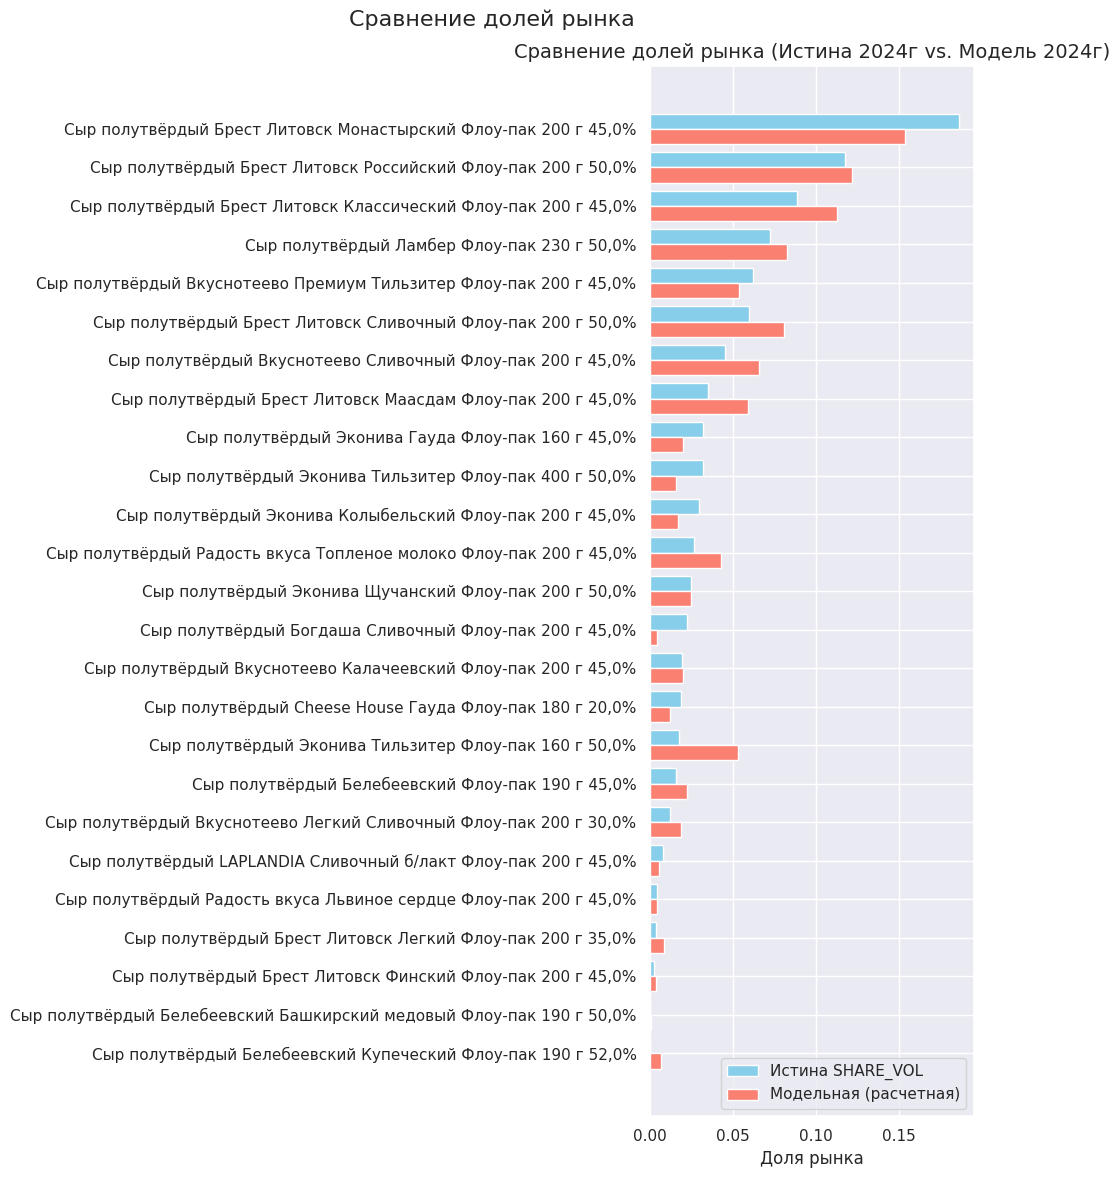

In [49]:
import matplotlib.pyplot as plt
import numpy as np

# Функция для построения горизонтальной диаграммы с фильтрацией меток по доле рынка
def plot_horizontal_bar_chart_with_filtered_labels(ax, sizes_org, sizes_pred, labels, title, min_share=0.10):
    # Фильтрация меток, отображаем только те, у которых доля >= min_share
    filtered_labels = [label if size_org >= min_share or size_pred >= min_share else '' for label, size_org, size_pred in zip(labels, sizes_org, sizes_pred)]
    filtered_sizes_org = [size_org if size_org >= min_share else 0 for size_org in sizes_org]
    filtered_sizes_pred = [size_pred if size_pred >= min_share else 0 for size_pred in sizes_pred]

    # Позиции по оси Y для меток
    y_pos = np.arange(len(filtered_sizes_org))

    # Построение горизонтальной столбчатой диаграммы для исходных данных
    ax.barh(y_pos - 0.2, filtered_sizes_org, height=0.4, color='skyblue', label='Истина SHARE_VOL')
    # Построение горизонтальной столбчатой диаграммы для предсказанных данных
    ax.barh(y_pos + 0.2, filtered_sizes_pred, height=0.4, color='salmon', label='Модельная (расчетная)')

    # Установка меток на оси Y
    ax.set_yticks(y_pos)
    ax.set_yticklabels(filtered_labels)
    ax.invert_yaxis()  # Инвертируем ось Y, чтобы самые большие значения были сверху
    ax.set_xlabel('Доля рынка')
    ax.set_title(title, fontsize=14)
    ax.legend()
    return ax

# Извлечение данных для построения диаграмм
sizes_org = mean_org['org_market_share'].values
sizes_pred = true_pred.to_frame()['pred_market_share'].values
labels_org = mean_org.index.values

# Сортировка по убыванию относительно sizes_org
sorted_indices = np.argsort(sizes_org)[::-1]  # Индексы отсортированных значений по убыванию
sizes_org_sorted = sizes_org[sorted_indices]
sizes_pred_sorted = sizes_pred[sorted_indices]
labels_org_sorted = labels_org[sorted_indices]

# Построение горизонтальной диаграммы с фильтрацией меток
fig, ax = plt.subplots(figsize=(10, 12))  # Увеличенный размер для удобного отображения меток
plot_horizontal_bar_chart_with_filtered_labels(ax, sizes_org_sorted, sizes_pred_sorted, labels_org_sorted, 'Сравнение долей рынка (Истина 2024г vs. Модель 2024г)', min_share=0.0)

# Общий заголовок
plt.suptitle('Сравнение долей рынка', fontsize=16)
plt.tight_layout()
plt.show()


In [50]:
model_data['price_index']

,price_index
0,0.728128
2,0.736683
4,0.776793
6,0.863607
8,0.696656
...,...
527,0.808674
528,1.003645
529,0.828602
530,0.944021


<ipython-input-51-39eadcd09b84>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  model_data.groupby(pd.cut(model_data['price_index'], bins=20))['sales_volume'].sum().plot(kind='bar', stacked=True)


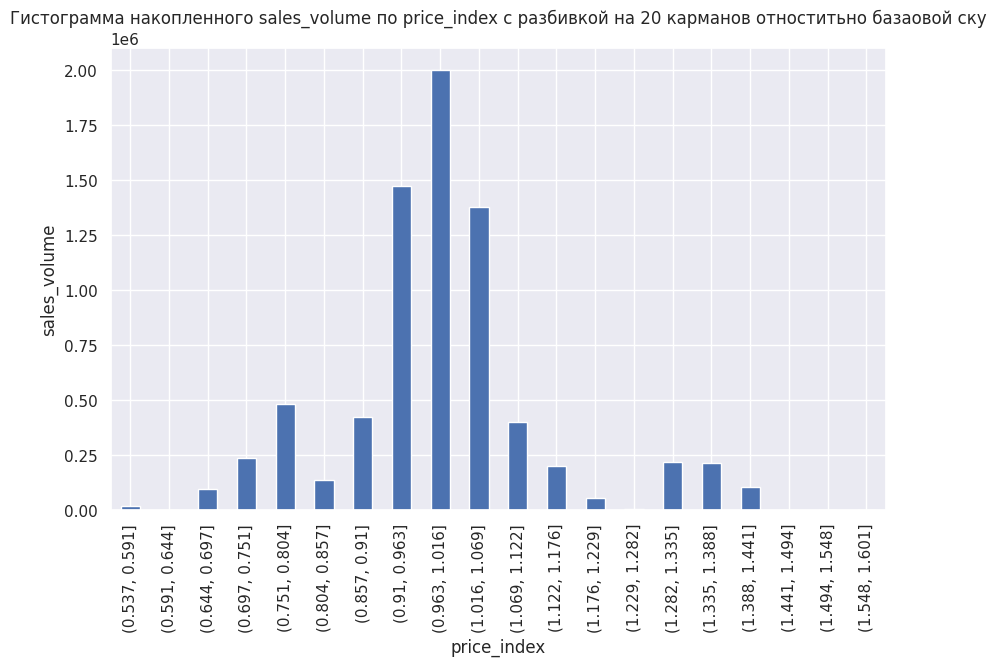

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
model_data.groupby(pd.cut(model_data['price_index'], bins=20))['sales_volume'].sum().plot(kind='bar', stacked=True)
plt.title('Гистограмма накопленного sales_volume по price_index с разбивкой на 20 карманов отноститьно базаовой ску')
plt.xlabel('price_index')
plt.ylabel('sales_volume')
plt.show()

In [52]:
res_data

,month,year,SKU,Package_Info,Cheese_Type,Brand,price_per_unit,sales_volume,promo_share,market_share_observed,period,Package_Weight,price_index,price_index_sq
40,1,2022,Сыр полутвёрдый Cheese House Гауда Флоу-пак 18...,180 г,Гауда,Cheese House,733.371208,203.04,0.352261,0.000439,1,180,0.864715,0.867290
41,1,2023,Сыр полутвёрдый Cheese House Гауда Флоу-пак 18...,180 г,Гауда,Cheese House,617.530714,4963.50,0.733761,0.010873,13,180,0.728128,0.762578
42,1,2024,Сыр полутвёрдый Cheese House Гауда Флоу-пак 18...,180 г,Гауда,Cheese House,630.556730,7907.04,0.720103,0.013854,25,180,0.743487,0.767058
43,2,2022,Сыр полутвёрдый Cheese House Гауда Флоу-пак 18...,180 г,Гауда,Cheese House,621.556729,247.14,0.659994,0.000540,5,180,0.732875,0.739488
44,2,2023,Сыр полутвёрдый Cheese House Гауда Флоу-пак 18...,180 г,Гауда,Cheese House,624.786691,4839.12,0.719032,0.011026,17,180,0.736683,0.775609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2030,10,2023,Сыр полутвёрдый Эконива Щучанский Флоу-пак 200...,200 г,Классический,Эконива,685.842388,14049.80,0.712729,0.022203,14,200,0.808674,0.842173
2031,11,2022,Сыр полутвёрдый Эконива Щучанский Флоу-пак 200...,200 г,Классический,Эконива,851.198597,3244.00,0.410310,0.005386,3,200,1.003645,1.008131
2032,11,2023,Сыр полутвёрдый Эконива Щучанский Флоу-пак 200...,200 г,Классический,Эконива,702.743684,12592.60,0.418561,0.021237,15,200,0.828602,0.841902
2033,12,2022,Сыр полутвёрдый Эконива Щучанский Флоу-пак 200...,200 г,Классический,Эконива,800.631289,8167.40,0.680883,0.015458,4,200,0.944021,0.936477


<ipython-input-53-42deec8b712d>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  res_data.groupby(pd.cut(res_data['price_index'], bins=20))['sales_volume'].sum().plot(kind='bar', stacked=True)


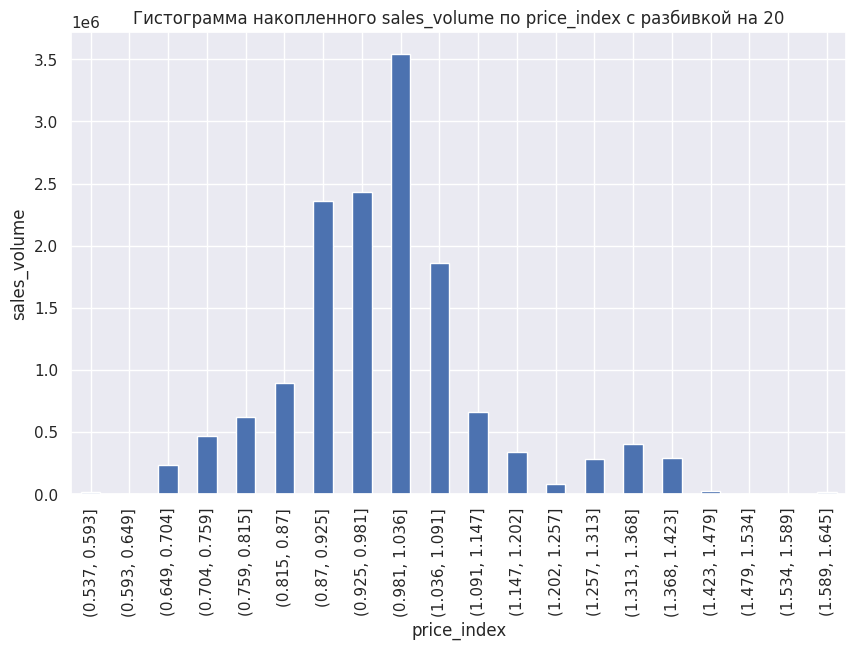

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
res_data.groupby(pd.cut(res_data['price_index'], bins=20))['sales_volume'].sum().plot(kind='bar', stacked=True)
plt.title('Гистограмма накопленного sales_volume по price_index с разбивкой на 20')
plt.xlabel('price_index')
plt.ylabel('sales_volume')
plt.show()


In [54]:
df_org

,Month,Year,Sku_name,Analytic1,Articul8,Brand,PRICE_PER_UNIT,SALES_VOL,SHARE_VOL_PROMO,SHARE_VOL
0,1,2022,"Сыр полутвёрдый BELFOR Флоу-пак 240 г 45,0%",240 г,Другой3,BELFOR,757.015534,68.88,0.971298,1.489290e-04
1,2,2022,"Сыр полутвёрдый BELFOR Флоу-пак 240 г 45,0%",240 г,Другой3,BELFOR,767.246528,2.88,0.491319,6.289358e-06
2,3,2022,"Сыр полутвёрдый BELFOR Флоу-пак 240 г 45,0%",240 г,Другой3,BELFOR,999.458333,0.24,0.000000,6.017645e-07
3,1,2024,Сыр полутвёрдый Casa Margot Эмменталер Флоу-па...,150 г,Эмменталер,Casa Margot,3024.421769,14.70,0.777143,2.575605e-05
4,2,2024,Сыр полутвёрдый Casa Margot Эмменталер Флоу-па...,150 г,Эмменталер,Casa Margot,3118.870635,12.60,0.726190,2.190801e-05
...,...,...,...,...,...,...,...,...,...,...
2030,10,2023,Сыр полутвёрдый Эконива Щучанский Флоу-пак 200...,200 г,Классический,Эконива,685.842388,14049.80,0.712729,2.220259e-02
2031,11,2022,Сыр полутвёрдый Эконива Щучанский Флоу-пак 200...,200 г,Классический,Эконива,851.198597,3244.00,0.410310,5.385691e-03
2032,11,2023,Сыр полутвёрдый Эконива Щучанский Флоу-пак 200...,200 г,Классический,Эконива,702.743684,12592.60,0.418561,2.123730e-02
2033,12,2022,Сыр полутвёрдый Эконива Щучанский Флоу-пак 200...,200 г,Классический,Эконива,800.631289,8167.40,0.680883,1.545795e-02


<ipython-input-55-af5481c8dc0c>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_org.groupby(pd.cut(df_org['price_index'], bins=40))['SALES_VOL'].sum().plot(kind='bar', stacked=True)


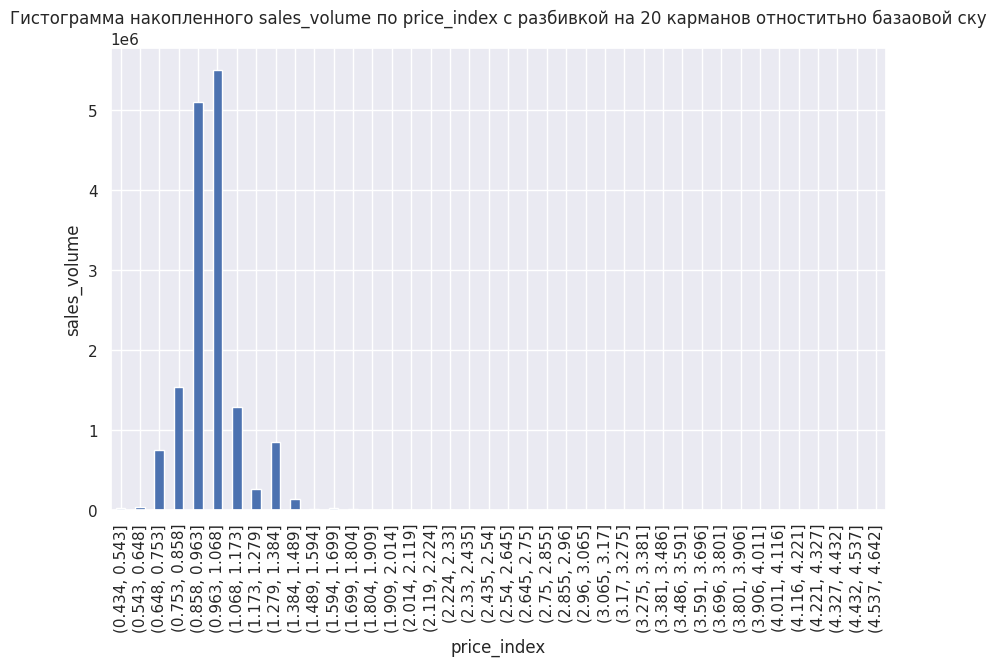

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
median_price= df_org['PRICE_PER_UNIT'].median()
df_org['price_index']=df_org['PRICE_PER_UNIT']/median_price
plt.figure(figsize=(10, 6))
df_org.groupby(pd.cut(df_org['price_index'], bins=40))['SALES_VOL'].sum().plot(kind='bar', stacked=True)
plt.title('Гистограмма накопленного sales_volume по price_index с разбивкой на 20 карманов отноститьно базаовой ску')
plt.xlabel('price_index')
plt.ylabel('sales_volume')
plt.show()

<ipython-input-56-7e77ac5c2fe9>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_org.groupby(pd.cut(df_org['price_index'], bins=40))['SHARE_VOL'].mean().plot(kind='bar', stacked=True)


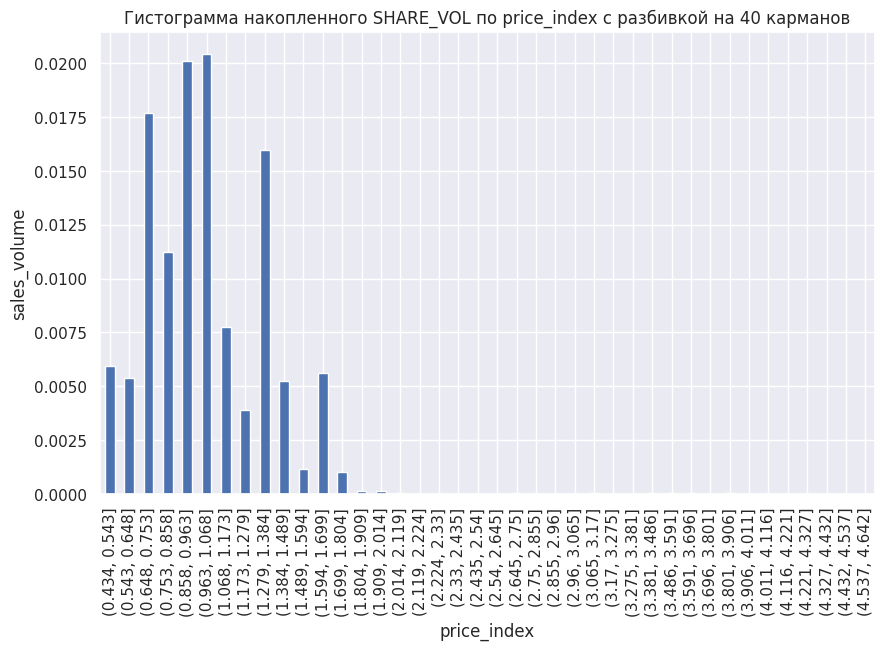

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
median_price= df_org['PRICE_PER_UNIT'].median()
df_org['price_index']=df_org['PRICE_PER_UNIT']/median_price
plt.figure(figsize=(10, 6))
df_org.groupby(pd.cut(df_org['price_index'], bins=40))['SHARE_VOL'].mean().plot(kind='bar', stacked=True)
plt.title('Гистограмма накопленного SHARE_VOL по price_index с разбивкой на 40 карманов')
plt.xlabel('price_index')
plt.ylabel('sales_volume')
plt.show()

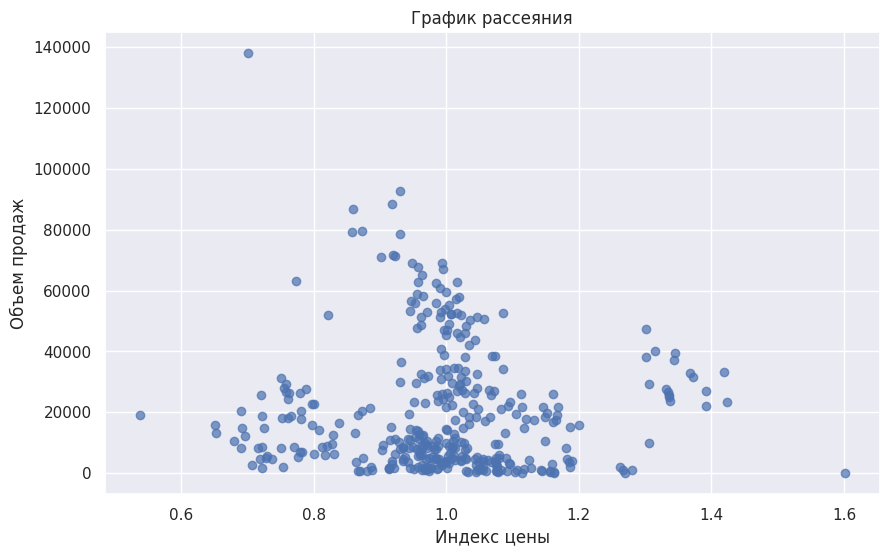

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

# Предполагая, что model_data - это ваш DataFrame
plt.figure(figsize=(10, 6))
plt.scatter(model_data['price_index'], model_data['sales_volume'], alpha=0.7)
plt.title('График рассеяния')
plt.xlabel('Индекс цены')
plt.ylabel('Объем продаж')
plt.grid(True)
plt.show()
